In [ ]:
import pandas as pd 
from google.colab import drive
import numpy as np
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/vgames2.csv')
df = pd.DataFrame(df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


- Name : 게임의 이름입니다.
- Platform : 게임이 지원되는 플랫폼의 이름입니다.
- Year : 게임이 출시된 연도입니다.
- Genre : 게임의 장르입니다.
- Publisher : 게임을 배급한 회사입니다.
- NA_Sales : 북미지역에서의 출고량입니다.
- EU_Sales : 유럽지역에서의 출고량입니다.
- JP_Sales : 일본지역에서의 출고량입니다.
- Other_Sales : 기타지역에서의 출고량입니다.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [ ]:
# 결측치 확인 
df.isnull().sum()

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
# 'Year' 값이 없는 것은 'Name'이 중복되더라도 'Year'가 같을지는 알 수 없기 때문에 'Year' 결측치가 있는 행은 제거 
df_1 = df.dropna(subset=['Year'])
df_1.isnull().sum()

Unnamed: 0      0
Name            0
Platform        0
Year            0
Genre          50
Publisher      36
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
dtype: int64

In [ ]:
df_1.Name.duplicated().sum()

4967

In [ ]:
df_name_dupl = df_1[df_1.Name.duplicated()]
df_name_dupl

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
131,132,Call of Duty 4: Modern Warfare,PC,2007.0,Shooter,Activision,0,1.12,0,0.03
230,231,IL-2 Sturmovik: Birds of Prey,DS,2009.0,Simulation,505 Games,0.06,0,0,0
250,251,NASCAR Unleashed,3DS,2011.0,Racing,Activision,0.18,0,0,0.01
279,280,The Incredibles: Rise of the Underminer,XB,2005.0,Action,THQ,0.06,0.02,0,0
343,344,NBA 2K12,X360,2011.0,Sports,Take-Two Interactive,2.31,0.14,0.01,0.16
...,...,...,...,...,...,...,...,...,...,...
16591,16592,Madden NFL 2005,PS2,2004.0,Sports,Electronic Arts,4.18,0.26,0.01,80K
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
df_name_dupl[df_name_dupl.isnull().any(axis = 1)]

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
3932,3933,MVP Baseball 2004,PS2,2004.0,NaN,Electronic Arts,1.1,0.06,0,0.18
5713,5714,Back to the Future: The Game,XOne,2015.0,NaN,Telltale Games,0,0.02,0,0
7336,7337,Madden NFL 11,PS2,2010.0,NaN,Electronic Arts,0.41,0.02,0,0.07
11268,11269,Cloudy With a Chance of Meatballs,PS3,2009.0,NaN,Ubisoft,0.09,0.01,0,0.01
11668,11669,The History Channel: Battle for the Pacific,Wii,2007.0,NaN,Activision,0.1,0,0,0.01
11699,11700,Time Travelers,PSV,2012.0,NaN,Level 5,0,0,0.05,0
12314,12315,Ice Hockey,2600,1980.0,NaN,Activision,0.46,0.03,0,0.01
14930,14931,Skylanders Giants,PS3,2012.0,NaN,Activision,0.35,0.52,0,0.22
15211,15212,James Bond 007: Nightfire,XB,2002.0,NaN,Electronic Arts,0.58,220K,0,0.03
16067,16068,Bound By Flame,X360,2014.0,Role-Playing,NaN,0,0.01,0,0


In [ ]:
df_name_dupl.isnull().sum()
# 결측치 값이 위의 데이터값과 같이 총 13개

Unnamed: 0      0
Name            0
Platform        0
Year            0
Genre          12
Publisher       1
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
dtype: int64

In [ ]:
# 확인 결과, 위 결측치를 그냥 제거해도 대세에 지장이 없으므로 결측치 제거
df_clean = df.dropna()

In [ ]:
df_clean.isnull().sum()

Unnamed: 0     0
Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16241 non-null  int64  
 1   Name         16241 non-null  object 
 2   Platform     16241 non-null  object 
 3   Year         16241 non-null  float64
 4   Genre        16241 non-null  object 
 5   Publisher    16241 non-null  object 
 6   NA_Sales     16241 non-null  object 
 7   EU_Sales     16241 non-null  object 
 8   JP_Sales     16241 non-null  object 
 9   Other_Sales  16241 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.4+ MB


In [ ]:
df_clean = df_clean.drop(['Unnamed: 0'], axis=1, inplace=False)

In [ ]:
df_clean.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [ ]:
# 중복치 확인 
df_clean.duplicated().sum()

0

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  object 
 6   EU_Sales     16241 non-null  object 
 7   JP_Sales     16241 non-null  object 
 8   Other_Sales  16241 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.2+ MB


In [ ]:
# 'Year' column에서 1900 이상 2024 이하의 정수가 아닌 값을 제거
df_clean = df_clean[df_clean['Year'].between(1900, 2025, inclusive=True)]
df_clean.info()

# 한번에 정리한 이유는 '19'라고 표기된 경우, '2019'년인지, '19XZ"년인지 알 수 없기 때문에 수정보다는 삭제를 택함. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16141 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16141 non-null  object 
 1   Platform     16141 non-null  object 
 2   Year         16141 non-null  float64
 3   Genre        16141 non-null  object 
 4   Publisher    16141 non-null  object 
 5   NA_Sales     16141 non-null  object 
 6   EU_Sales     16141 non-null  object 
 7   JP_Sales     16141 non-null  object 
 8   Other_Sales  16141 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.2+ MB


<ipython-input-828-1235eb965ecf>:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  df_clean = df_clean[df_clean['Year'].between(1900, 2025, inclusive=True)]


In [ ]:
# 'Platform" column 내의 숫자로 되어 있는 이상치 제거 

import re
df_clean = df_clean[~df_clean['Platform'].str.contains(r'\d')]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10258 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         10258 non-null  object 
 1   Platform     10258 non-null  object 
 2   Year         10258 non-null  float64
 3   Genre        10258 non-null  object 
 4   Publisher    10258 non-null  object 
 5   NA_Sales     10258 non-null  object 
 6   EU_Sales     10258 non-null  object 
 7   JP_Sales     10258 non-null  object 
 8   Other_Sales  10258 non-null  object 
dtypes: float64(1), object(8)
memory usage: 801.4+ KB


In [ ]:
# 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales' column에서 'K'와 'M'이 들어간 값을 제거
cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
for col in cols:
    df_clean = df_clean[~df_clean[col].str.contains(r'[KM]', na=False)]

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9771 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         9771 non-null   object 
 1   Platform     9771 non-null   object 
 2   Year         9771 non-null   float64
 3   Genre        9771 non-null   object 
 4   Publisher    9771 non-null   object 
 5   NA_Sales     9771 non-null   object 
 6   EU_Sales     9771 non-null   object 
 7   JP_Sales     9771 non-null   object 
 8   Other_Sales  9771 non-null   object 
dtypes: float64(1), object(8)
memory usage: 763.4+ KB


In [ ]:
# Sales data type 변경
df_clean = df_clean.astype({'Year':'int','NA_Sales' : 'float','EU_Sales': 'float', 'JP_Sales': 'float','Other_Sales': 'float'})
df_clean.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.0,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.0,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.0,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.0,0.00,0.00
5,Power Pro Kun Pocket 8,DS,2005,Sports,Konami Digital Entertainment,0.00,0.0,0.14,0.00


In [ ]:
# year 에 이상치가 있는지 확인
df_clean['Year'].unique()

array([2008, 2009, 2010, 2005, 2011, 2003, 2006, 1997, 2002, 1996, 2004,
       2000, 2007, 1998, 2001, 1985, 2015, 1995, 1993, 2012, 2014, 1999,
       1987, 2013, 2016, 1994, 1990, 1992, 1991, 1983, 1984, 1988, 1989,
       1986, 2017])

In [ ]:
# Genre 내용 확인
df_clean['Genre'].unique()

array(['Action', 'Adventure', 'Misc', 'Sports', 'Simulation',
       'Role-Playing', 'Puzzle', 'Strategy', 'Platform', 'Racing',
       'Shooter', 'Fighting'], dtype=object)

In [ ]:
# EDA 한 데이터 프레임 중간 저장
df_clean.to_csv('/content/drive/MyDrive/Colab Notebooks/game_clean.csv')

In [ ]:
# 각 지역마다 선호하는 게임 장르 구하기
na_preferred_genre = df_clean.groupby('Genre')['NA_Sales'].sum().idxmax()
eu_preferred_genre = df_clean.groupby('Genre')['EU_Sales'].sum().idxmax()
jp_preferred_genre = df_clean.groupby('Genre')['JP_Sales'].sum().idxmax()
other_preferred_genre = df_clean.groupby('Genre')['Other_Sales'].sum().idxmax()

print(f"The most preferred genre in North America is {na_preferred_genre}.")
print(f"The most preferred genre in Europe is {eu_preferred_genre}.")
print(f"The most preferred genre in Japan is {jp_preferred_genre}.")
print(f"The most preferred genre in other regions is {other_preferred_genre}.")

The most preferred genre in North America is Action.
The most preferred genre in Europe is Action.
The most preferred genre in Japan is Role-Playing.
The most preferred genre in other regions is Action.


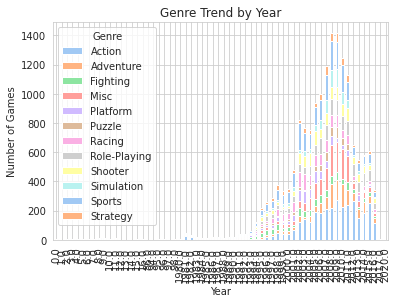

In [ ]:
import matplotlib.pyplot as plt
# 연도별 Genre 트랜드 확인
genre_trend = df.groupby(['Year', 'Genre']).size().reset_index(name='count')
genre_trend = genre_trend.pivot(index='Year', columns='Genre', values='count')
genre_trend.plot(kind='bar', stacked=True)
plt.title('Genre Trend by Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.show()

In [ ]:
# 연도별 Genre count 계산
genre_count = df_clean.groupby(['Year', 'Genre']).size().reset_index(name='count')
genre_count 

,Year,Genre,count
0,1983,Misc,1
1,1983,Platform,4
2,1983,Sports,1
3,1984,Action,1
4,1984,Misc,1
...,...,...,...
356,2016,Simulation,4
357,2016,Sports,11
358,2016,Strategy,7
359,2017,Action,1


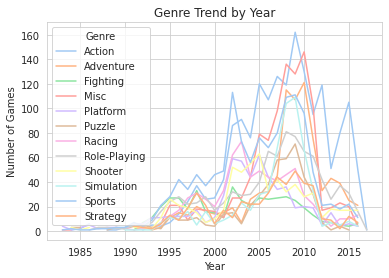

In [ ]:
# 장르별로 연도별 count 수 그래프 그리기
genre_trend = genre_count.pivot(index='Year', columns='Genre', values='count')
genre_trend.plot(kind='line')
plt.title('Genre Trend by Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.show()

In [ ]:
# 연도별 가장 높은 count를 가진 Genre 확인
max_genres = genre_count.groupby('Year')['count', 'Genre'].apply(lambda x: x['Genre'][x['count'].idxmax()])
print(max_genres)

Year
1983        Platform
1984          Puzzle
1985        Platform
1986          Action
1987    Role-Playing
1988        Platform
1989        Platform
1990          Action
1991          Sports
1992        Fighting
1993        Fighting
1994          Sports
1995          Sports
1996          Sports
1997          Sports
1998          Sports
1999          Sports
2000          Sports
2001          Sports
2002          Sports
2003          Action
2004          Action
2005          Action
2006          Action
2007          Action
2008            Misc
2009          Action
2010            Misc
2011            Misc
2012          Action
2013          Action
2014          Action
2015          Action
2016          Action
2017          Action
dtype: object


<ipython-input-761-31a7e7084274>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  max_genres = genre_count.groupby('Year')['count', 'Genre'].apply(lambda x: x['Genre'][x['count'].idxmax()])


In [ ]:
# Name 별 총 sales 합 구하기
sales_by_name = df_clean.groupby('Name')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().sum(axis=1)
sales_by_name = sales_by_name.sort_values(ascending=False)

In [ ]:
sales_by_name_1 = sales_by_name.head(10)
sales_by_name_1

Name
Wii Sports                   82.74
Super Mario Bros.            45.31
Tetris                       35.84
Mario Kart Wii               35.83
Wii Sports Resort            33.00
Pokemon Red/Pokemon Blue     31.38
New Super Mario Bros.        30.01
Wii Play                     29.01
New Super Mario Bros. Wii    28.61
Duck Hunt                    28.31
dtype: float64

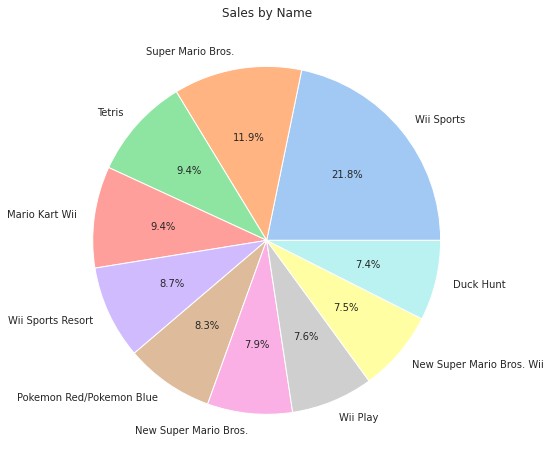

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 파이 차트를 그리기 위해 이름과 매출 데이터 추출
names = sales_by_name_1.index
sales = sales_by_name_1.values

# 파이 차트 시각화
plt.figure(figsize=(10, 8))
sns.set_palette("pastel")
plt.pie(sales, labels=names, autopct='%1.1f%%')
plt.title("Sales by Name")
plt.show()

In [ ]:
sales_by_name.to_csv('/content/drive/MyDrive/Colab Notebooks/sale_by_game.csv')

In [ ]:
sales_by_name_2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sale_by_game.csv', header =0) # header =0 은 1행 값을 column 명으로 지정하고 파일 불러오기.
sales_by_name_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8201 entries, 0 to 8200
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    8201 non-null   object 
 1   0       8201 non-null   float64
dtypes: float64(1), object(1)
memory usage: 128.3+ KB


In [ ]:
max_value = sales_by_name_2['0'].max()
max_name = sales_by_name_2.loc[sales_by_name_2['0'] == max_value, 'Name'].iloc[0]
print(max_value, max_name)

82.74000000000001 Wii Sports


In [ ]:
# 높은 매출 순위로 1500개 행을 추출하고
# 그 게임에 해당하는 Genre, Platform을 확인하여
# 게임명, Platform, Genre, 총 매출 합을 구하여 그 상관관계를 살핀다. 

In [ ]:
# 총 매출액 열 추가
df_clean['Total_Sales'] = df_clean['NA_Sales'] + df_clean['EU_Sales'] + df_clean['JP_Sales'] + df_clean['Other_Sales']
df_clean.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.0,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.0,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.0,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.0,0.00,0.00,0.04
5,Power Pro Kun Pocket 8,DS,2005,Sports,Konami Digital Entertainment,0.00,0.0,0.14,0.00,0.14


In [ ]:
df_sorted = df_clean.sort_values(by='Total_Sales', ascending=False)
top_1500_sales = df_sorted.head(1500)
top_1500_sales

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2908,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4199,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
12579,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3352,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7829,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
...,...,...,...,...,...,...,...,...,...,...
10881,Wall-E,PSP,2008,Platform,THQ,0.29,0.22,0.00,0.14,0.65
7277,Crash of the Titans,PSP,2007,Action,Vivendi Games,0.25,0.25,0.00,0.15,0.65
14848,Gravity Rush,PSV,2012,Action,Sony Computer Entertainment,0.26,0.20,0.09,0.10,0.65
11113,World of Dragon Warrior - Torneko: The Last Hope,PS,1999,Role-Playing,Enix Corporation,0.02,0.01,0.58,0.04,0.65


In [ ]:
top_1500_sales_sum_publ = top_1500_sales.groupby('Publisher')['Total_Sales'].sum()
top_1500_sales_sum_publ.sort_values(ascending=False)

Publisher
Nintendo                       1354.23
Electronic Arts                 277.98
Sony Computer Entertainment     199.11
Activision                      171.77
Ubisoft                         146.34
                                ...   
Tomy Corporation                  0.69
Funbox Media                      0.67
Rocket Company                    0.67
IE Institute                      0.66
Rondomedia                        0.65
Name: Total_Sales, Length: 95, dtype: float64

In [ ]:
top_1500_sales_sum_plat = top_1500_sales.groupby('Platform')['Total_Sales'].sum()
top_1500_sales_sum_plat.sort_values(ascending=False)

Platform
Wii     669.14
DS      508.60
PS      500.81
NES     232.18
GB      229.38
PC      172.29
GBA     161.50
SNES    154.36
PSP     149.61
XB      124.05
GC      113.10
XOne    103.25
WiiU     54.33
GEN      26.78
PSV      16.82
DC        8.82
SCD       1.50
SAT       1.16
Name: Total_Sales, dtype: float64

In [ ]:
top_1500_sales_sum_genre = top_1500_sales.groupby('Genre')['Total_Sales'].sum()
top_1500_sales_sum_genre.sort_values(ascending=False)

Genre
Platform        505.10
Sports          458.73
Action          422.24
Role-Playing    398.10
Misc            345.86
Racing          254.02
Shooter         224.60
Simulation      182.29
Puzzle          154.01
Fighting        140.60
Adventure        75.22
Strategy         66.91
Name: Total_Sales, dtype: float64

In [860]:
# "Publisher"를 기준으로 "Genre" 수와 "Platform" 수 groupby
grouped = top_1500_sales.groupby('Publisher').agg({'Genre': 'count', 'Platform': 'nunique','NA_Sales':'sum','EU_Sales':'sum','JP_Sales':'sum','Other_Sales':'sum','Total_Sales':'sum'})
grouped.head()
grouped = pd.DataFrame(grouped)
grouped = grouped.rename(columns={'Genre':'Game_Number'})
grouped

,Game_Number,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Publisher,,,,,,,
3DO,2,1,1.57,0.46,0.00,0.10,2.13
505 Games,7,2,10.60,7.29,0.23,1.99,20.11
989 Studios,7,1,7.79,2.33,0.10,0.49,10.71
ASC Games,1,1,0.73,0.50,0.00,0.09,1.32
ASCII Entertainment,4,2,0.00,0.00,5.04,0.21,5.25
...,...,...,...,...,...,...,...
Virgin Interactive,14,4,11.74,8.47,5.48,1.99,27.68
Vivendi Games,10,5,12.39,3.42,0.17,0.52,16.50
Warner Bros. Interactive Entertainment,22,6,16.96,9.08,0.07,2.72,28.83


In [861]:
grouped_20 = grouped.sort_values(by='Total_Sales', ascending=False)
grouped_20
grouped_20 = grouped_20.head(20)
grouped_20


,Game_Number,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Publisher,,,,,,,
Nintendo,300,8,633.67,324.56,317.89,78.11,1354.23
Electronic Arts,208,11,152.46,101.10,1.24,23.18,277.98
Sony Computer Entertainment,93,3,87.32,59.32,35.76,16.71,199.11
Activision,101,12,96.59,60.77,0.64,13.77,171.77
Ubisoft,87,11,78.34,54.41,0.28,13.31,146.34
Sega,63,11,51.85,40.07,8.80,9.35,110.07
THQ,73,7,54.15,26.39,1.48,6.45,88.47
Capcom,41,9,25.27,9.40,30.19,4.02,68.88
Take-Two Interactive,34,8,33.53,23.11,0.58,8.00,65.22


In [862]:
grouped_3 = grouped_20.head(3)

In [863]:
grouped_5 = grouped_20.head(5)

In [864]:
grouped_10 = grouped_20.head(10)

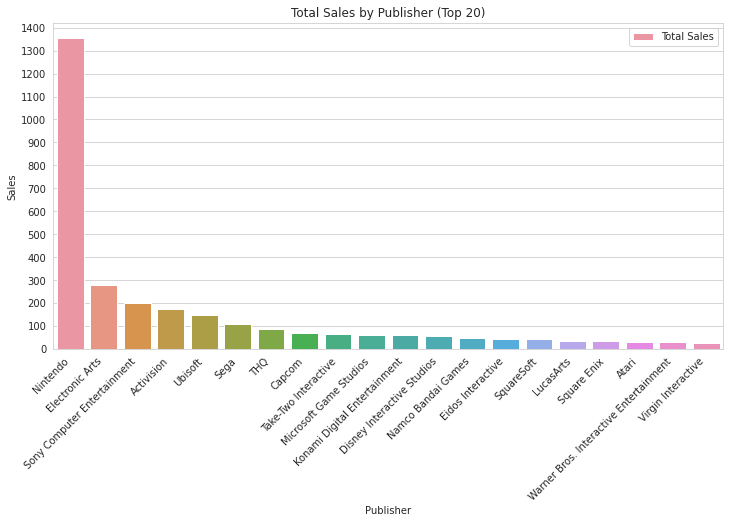

In [865]:
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터프레임에 새로운 열 추가
grouped_20['Total_Sales'] = grouped_20[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)

# barplot 그리기
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x=grouped_20.index, y="Total_Sales", data=grouped_20, label='Total Sales')
plt.xlabel("Publisher")
plt.ylabel("Sales")
plt.title("Total Sales by Publisher (Top 20)")
plt.xticks(rotation=45, ha='right')
plt.legend()

# y축 눈금 레이블 수정
plt.yticks(range(0, int(grouped_20['Total_Sales'].max())+100, 100))

plt.show()

In [866]:
grouped.sort_values(by='NA_Sales', ascending=False)

,Game_Number,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Publisher,,,,,,,
Nintendo,300,8,633.67,324.56,317.89,78.11,1354.23
Electronic Arts,208,11,152.46,101.10,1.24,23.18,277.98
Activision,101,12,96.59,60.77,0.64,13.77,171.77
Sony Computer Entertainment,93,3,87.32,59.32,35.76,16.71,199.11
Ubisoft,87,11,78.34,54.41,0.28,13.31,146.34
...,...,...,...,...,...,...,...
Quest,1,1,0.00,0.00,0.71,0.00,0.71
Pinnacle,1,1,0.00,0.82,0.00,0.06,0.88
ASCII Entertainment,4,2,0.00,0.00,5.04,0.21,5.25


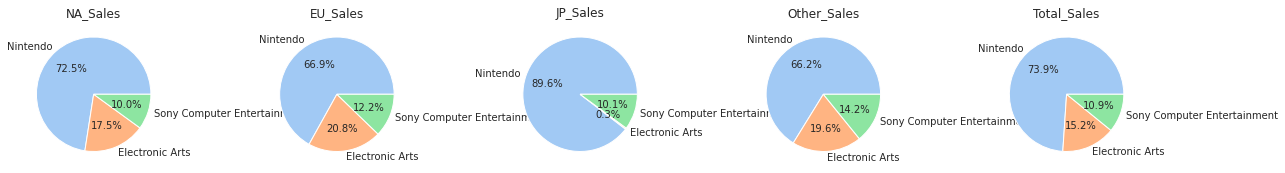

In [867]:
# 데이터 생성
labels = grouped_3.index

# 열 이름에 해당하는 리스트 생성
columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales']

# 파이 차트 그리기
fig, axs = plt.subplots(1, 5, figsize=(20, 4))
for i, column in enumerate(columns):
    sizes = grouped_3[column]
    axs[i].pie(sizes, labels=labels, autopct='%1.1f%%')
    axs[i].set_title(column)

# 그래프 간격 조절
plt.subplots_adjust(wspace=0.7)
# 그래프 출력
plt.show()


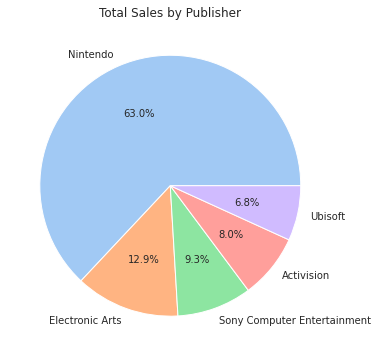

In [868]:
# Total sales 파이 그래프 

# 데이터 생성
sizes = grouped_5['Total_Sales']
labels = grouped_5.index

# 파이 차트 그리기
fig, axs = plt.subplots(1, 1, figsize=(6, 6))
axs.pie(sizes, labels=labels, autopct='%1.1f%%')
axs.set_title("Total Sales by Publisher")

# 그래프 출력
plt.show()

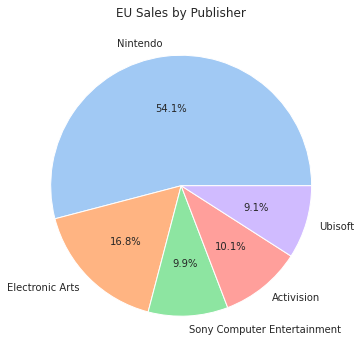

In [869]:
# EU sales 파이 그래프 

# 데이터 생성
sizes = grouped_5['EU_Sales']
labels = grouped_5.index

# 파이 차트 그리기
fig, axs = plt.subplots(1, 1, figsize=(6, 6))
axs.pie(sizes, labels=labels, autopct='%1.1f%%')
axs.set_title("EU Sales by Publisher")

# 그래프 출력
plt.show()

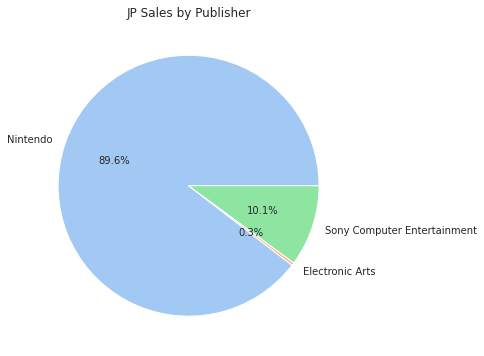

In [870]:
# JP sales 파이 그래프 

# 데이터 생성
sizes = grouped_3['JP_Sales']
labels = grouped_3.index

# 파이 차트 그리기
fig, axs = plt.subplots(1, 1, figsize=(6, 6))
axs.pie(sizes, labels=labels, autopct='%1.1f%%')
axs.set_title("JP Sales by Publisher")

# 그래프 출력
plt.show()

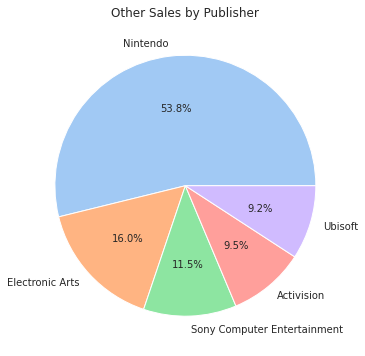

In [871]:
# Other sales 파이 그래프 

# 데이터 생성
sizes = grouped_5['Other_Sales']
labels = grouped_5.index

# 파이 차트 그리기
fig, axs = plt.subplots(1, 1, figsize=(6, 6))
axs.pie(sizes, labels=labels, autopct='%1.1f%%')
axs.set_title("Other Sales by Publisher")

# 그래프 출력
plt.show()

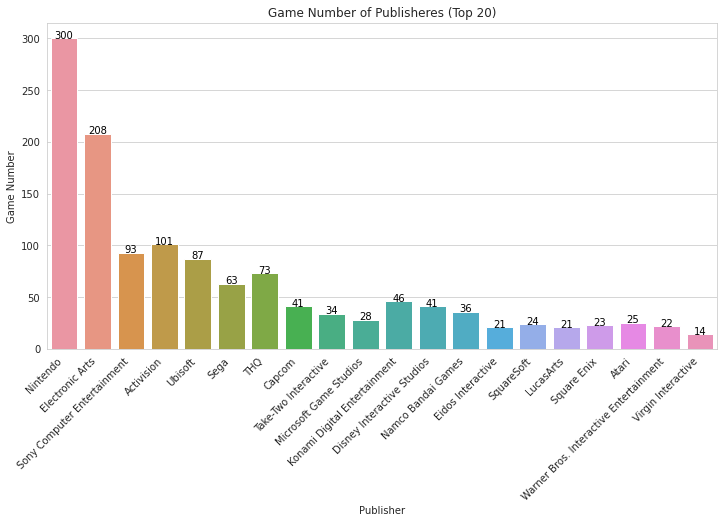

In [872]:
# 회사별 Genre Number 구하기 

# barplot 그리기
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_publishers_df.index, y="Genre", data=top_publishers_df)
plt.xlabel("Publisher")
plt.ylabel("Game Number")
plt.title("Game Number of Publisheres (Top 20)")
plt.xticks(rotation=45, ha='right')

# Bar 위에 숫자 표시
for i, v in enumerate(top_publishers_df['Genre']):
    ax.text(i, v, str(v), color='black', ha="center")

# 출력
plt.show()

In [873]:
grouped_eu = grouped.sort_values(by='EU_Sales', ascending=False)
grouped_eu

,Game_Number,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Publisher,,,,,,,
Nintendo,300,8,633.67,324.56,317.89,78.11,1354.23
Electronic Arts,208,11,152.46,101.10,1.24,23.18,277.98
Activision,101,12,96.59,60.77,0.64,13.77,171.77
Sony Computer Entertainment,93,3,87.32,59.32,35.76,16.71,199.11
Ubisoft,87,11,78.34,54.41,0.28,13.31,146.34
...,...,...,...,...,...,...,...
Hudson Entertainment,1,1,0.00,0.00,0.74,0.05,0.79
IE Institute,1,1,0.00,0.00,0.66,0.00,0.66
Quest,1,1,0.00,0.00,0.71,0.00,0.71


In [874]:
grouped_eu

,Game_Number,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Publisher,,,,,,,
Nintendo,300,8,633.67,324.56,317.89,78.11,1354.23
Electronic Arts,208,11,152.46,101.10,1.24,23.18,277.98
Activision,101,12,96.59,60.77,0.64,13.77,171.77
Sony Computer Entertainment,93,3,87.32,59.32,35.76,16.71,199.11
Ubisoft,87,11,78.34,54.41,0.28,13.31,146.34
...,...,...,...,...,...,...,...
Hudson Entertainment,1,1,0.00,0.00,0.74,0.05,0.79
IE Institute,1,1,0.00,0.00,0.66,0.00,0.66
Quest,1,1,0.00,0.00,0.71,0.00,0.71


In [875]:
grouped_jp = grouped.sort_values(by='JP_Sales', ascending=False)
grouped_jp

,Game_Number,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Publisher,,,,,,,
Nintendo,300,8,633.67,324.56,317.89,78.11,1354.23
Sony Computer Entertainment,93,3,87.32,59.32,35.76,16.71,199.11
Capcom,41,9,25.27,9.40,30.19,4.02,68.88
SquareSoft,24,5,7.84,3.08,29.53,0.97,41.42
Enix Corporation,12,5,0.62,0.20,24.86,0.15,25.83
...,...,...,...,...,...,...,...
Mindscape,2,2,3.12,0.41,0.00,0.27,3.80
NCSoft,1,1,0.95,1.06,0.00,0.29,2.30
Nobilis,1,1,0.61,0.10,0.00,0.06,0.77


In [876]:
#상위 10개 JP 매출 추출
grouped_jp = grouped_jp.head(10)
grouped_jp 

,Game_Number,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Publisher,,,,,,,
Nintendo,300,8,633.67,324.56,317.89,78.11,1354.23
Sony Computer Entertainment,93,3,87.32,59.32,35.76,16.71,199.11
Capcom,41,9,25.27,9.40,30.19,4.02,68.88
SquareSoft,24,5,7.84,3.08,29.53,0.97,41.42
Enix Corporation,12,5,0.62,0.20,24.86,0.15,25.83
Namco Bandai Games,36,12,13.48,6.94,24.74,1.49,46.65
Konami Digital Entertainment,46,8,21.67,12.42,21.02,3.30,58.41
Square Enix,23,6,11.30,4.35,14.39,2.14,32.18
Sega,63,11,51.85,40.07,8.80,9.35,110.07


In [877]:
grouped_other = grouped.sort_values(by='Other_Sales', ascending=False)
grouped_other

,Game_Number,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Publisher,,,,,,,
Nintendo,300,8,633.67,324.56,317.89,78.11,1354.23
Electronic Arts,208,11,152.46,101.10,1.24,23.18,277.98
Sony Computer Entertainment,93,3,87.32,59.32,35.76,16.71,199.11
Activision,101,12,96.59,60.77,0.64,13.77,171.77
Ubisoft,87,11,78.34,54.41,0.28,13.31,146.34
...,...,...,...,...,...,...,...
Rocket Company,1,1,0.00,0.00,0.67,0.00,0.67
ChunSoft,2,1,0.00,0.00,1.59,0.00,1.59
IE Institute,1,1,0.00,0.00,0.66,0.00,0.66


In [878]:
grouped.to_csv('/content/drive/MyDrive/Colab Notebooks/grouped_3.csv')

In [879]:
grouped_1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/grouped_3.csv', header =0)

<AxesSubplot:>

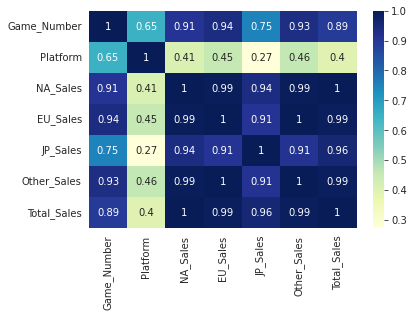

In [880]:
grouped_corr = grouped_1.corr()
import seaborn as sns
sns.heatmap(grouped_1.corr(), annot=True, cmap='YlGnBu')

In [881]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

In [882]:
scaler = StandardScaler()
grouped_2 = grouped_1.drop('Publisher', axis = 1)
grouped_2_PCA = scaler.fit_transform(grouped_2)
pca = PCA() 
pca.fit(grouped_2_PCA)
print(pca.explained_variance_ratio_)

[8.48471169e-01 1.26414451e-01 2.13097983e-02 2.96320183e-03
 6.39768077e-04 2.01611768e-04 1.41459254e-32]


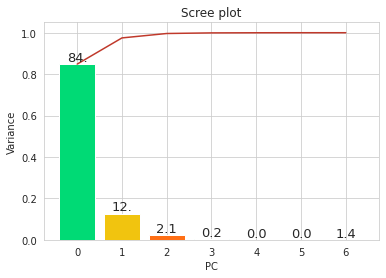

In [883]:
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    
    ax = plt.subplot()
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals, color = ['#00da75', '#f1c40f',  '#ff6f15']) # Bar plot
    ax.plot(ind, cumvals, color = '#c0392b') # Line plot 
    
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va = "bottom", ha = "center", fontsize = 13)
     
    ax.set_xlabel("PC")
    ax.set_ylabel("Variance")
    plt.title('Scree plot')
  
scree_plot(pca)

In [884]:
grouped_2_log = np.log(grouped_2 + 1e-10)
grouped_2_scaled = scaler.fit_transform(grouped_2_log)
grouped_2_scaled = np.nan_to_num(grouped_2_scaled)
grouped_2_scaled = pd.DataFrame(grouped_2_scaled)
grouped_2_scaled.isnull().sum()
grouped_2_scaled.dropna(inplace = True)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

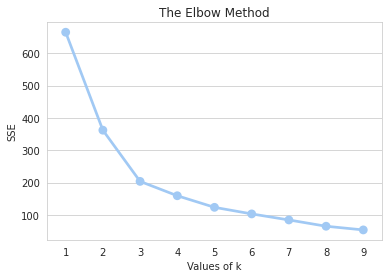

In [885]:
from sklearn.cluster import KMeans
sse = {}

for k in range(1,10):
  kmeans = KMeans(n_clusters=k, random_state=1)
  kmeans.fit(grouped_2_scaled)
  sse[k] = kmeans.inertia_

plt.title('The Elbow Method')
plt.xlabel('Values of k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [886]:
grouped_2_scaled

,0,1,2,3,4,5,6
0,-0.365357,-0.739466,0.269775,0.242480,-1.023519,0.021330,-0.431316
1,0.447665,0.094081,0.522727,0.589730,0.830987,0.597775,0.849134
2,0.447665,-0.739466,0.481930,0.446378,0.759331,0.327646,0.489803
3,-0.815197,-0.739466,0.168345,0.252959,-1.023519,0.001022,-0.704214
4,0.084484,0.094081,-2.839766,-2.553745,1.096573,0.164334,0.083184
...,...,...,...,...,...,...,...
90,0.897506,0.927627,0.536256,0.608584,1.103774,0.597775,1.031351
91,0.679141,1.195969,0.543394,0.494609,0.804981,0.339100,0.736290
92,1.190836,1.415221,0.584979,0.617324,0.728646,0.658007,1.054567
93,-0.815197,-0.739466,0.268076,-2.553745,-1.023519,-3.972964,-0.612606


In [887]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(grouped_2_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=1)

In [888]:
labels = kmeans.labels_
grouped_2 = grouped_2.assign(cluster = labels)
grouped_2['cluster'].value_counts()
grouped_2.to_csv('/content/drive/MyDrive/Colab Notebooks/grouped_2.csv')
grouped_2

,Game_Number,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,cluster
0,2,1,1.57,0.46,0.00,0.10,2.13,1
1,7,2,10.60,7.29,0.23,1.99,20.11,0
2,7,1,7.79,2.33,0.10,0.49,10.71,1
3,1,1,0.73,0.50,0.00,0.09,1.32,1
4,4,2,0.00,0.00,5.04,0.21,5.25,2
...,...,...,...,...,...,...,...,...
90,14,4,11.74,8.47,5.48,1.99,27.68,0
91,10,5,12.39,3.42,0.17,0.52,16.50,0
92,22,6,16.96,9.08,0.07,2.72,28.83,0
93,1,1,1.55,0.00,0.00,0.00,1.55,2


<AxesSubplot:xlabel='Game_Number', ylabel='NA_Sales'>

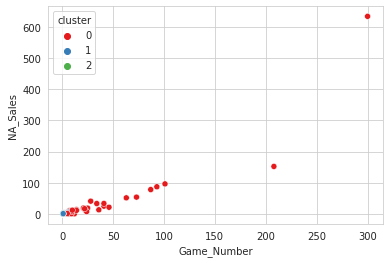

In [891]:
sns.scatterplot(data = grouped_2, x = 'Game_Number', y = 'NA_Sales', hue = 'cluster', palette = 'Set1')

<AxesSubplot:xlabel='Game_Number', ylabel='EU_Sales'>

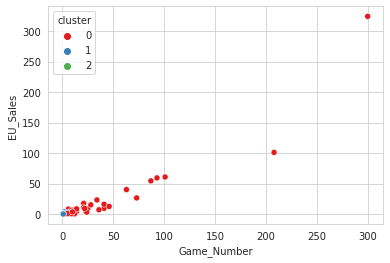

In [893]:
sns.scatterplot(data = grouped_2, x = 'Game_Number', y = 'EU_Sales', hue = 'cluster', palette = 'Set1')

<AxesSubplot:xlabel='Game_Number', ylabel='JP_Sales'>

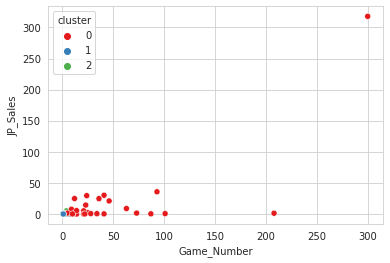

In [894]:
sns.scatterplot(data = grouped_2, x = 'Game_Number', y = 'JP_Sales', hue = 'cluster', palette = 'Set1')

<AxesSubplot:xlabel='Game_Number', ylabel='Total_Sales'>

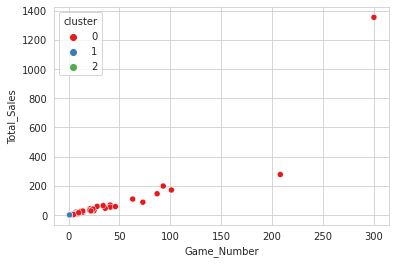

In [892]:
sns.scatterplot(data = grouped_2, x = 'Game_Number', y = 'Total_Sales', hue = 'cluster', palette = 'Set1')

In [890]:
# Insight 
# 출시한 게임 수가 많을 수록 총 매출이 높음.
# 연도별 트렌드에 맞는 장르에 해당하는 게임을 많이 출시해야 매출을 높일 수 있음. 
# 지역별 선호하는 장르에 맞게 게임을 출시해야 할 것임. 